# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset

In [7]:
dados = pd.read_csv('dados_projeto.csv', sep = ';')

### Visualize o conteúdo do DataFrame

In [79]:
dados.shape

(365, 4)

In [80]:
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Obtenha e avalie as estatísticas descritivas dos dados

In [9]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

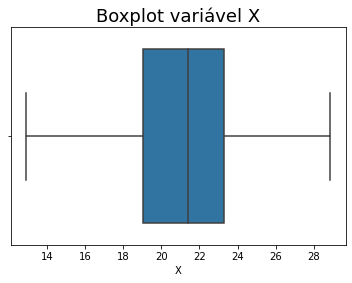

In [25]:
ax = sns.boxplot(x = 'X', data = dados)
ax.set_title('Boxplot variável X', fontsize = 18)
ax = ax

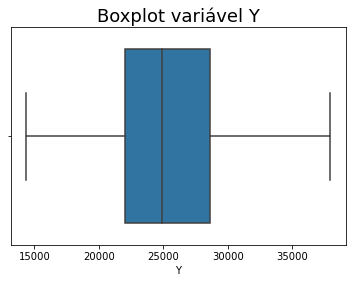

In [26]:
ax = sns.boxplot(x = 'Y', data = dados)
ax.set_title('Boxplot variável Y', fontsize = 18)
ax = ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

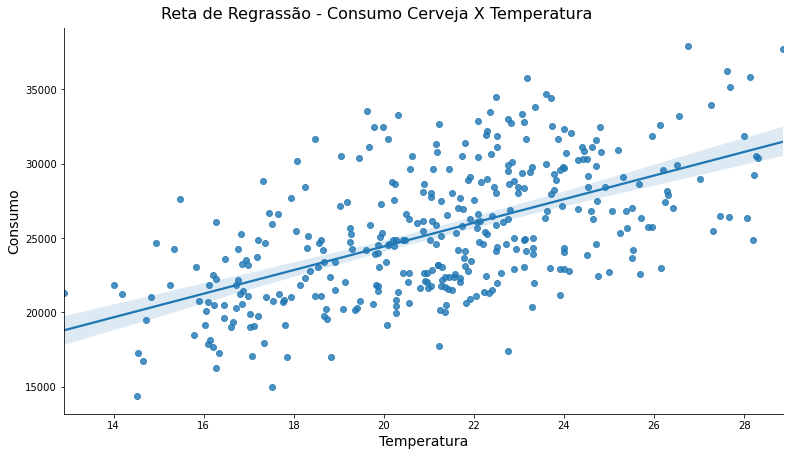

In [29]:
ax = sns.lmplot(x = 'X', y = 'Y', data = dados)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regrassão - Consumo Cerveja X Temperatura', fontsize = 16, y = 1.02)
ax.set_xlabels('Temperatura', fontsize = 14)
ax.set_ylabels('Consumo', fontsize = 14)
ax = ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [31]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim, há uma pequena relação

É possível quantificar a intensidade dessa relação?

Resp.: Sim, através da correlaçao

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [36]:
import statsmodels.api as sm

Y = dados.Y
X = sm.add_constant(dados.X)

### Estime o modelo de regressão linear simples

In [38]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

### Visualize o resultado da regressão

In [81]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.87e-33
Time:                        01:21:42   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [41]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [54]:
resultado_regressao.predict([1, 42])[0]
print(f'Para um dia de 42 graus celsiuis o consumo de cerveja seria {resultado_regressao.predict([1, 42])[0] : 0.0f}')

Para um dia de 42 graus celsiuis o consumo de cerveja seria  41914


### Obtenha os resíduos da regressão

In [61]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

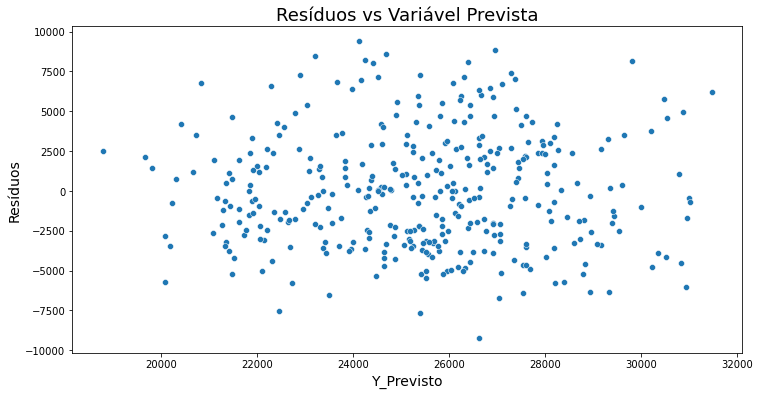

In [65]:
ax = sns.scatterplot(x=dados.Y_previsto, y = dados.Residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Variável Prevista', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax = ax

### Obtenha o QQPlot dos resíduos

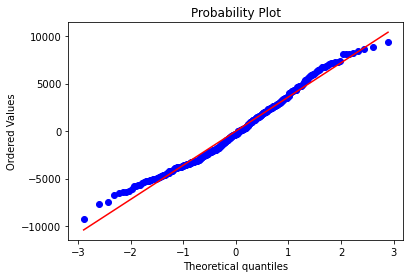

In [67]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_,(_,_,_)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

Os resíduos se distribuem como uma normal

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [68]:
SQR = dados.Y_previsto.apply(lambda x: (x - dados.Y.mean()) ** 2 ).sum()
SQR

2325899486.7377853

In [69]:
SQT = dados.Y.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQT

7044294174.805479

In [70]:
SQE = dados.Residuos.apply(lambda x: (x**2)).sum()
SQE

4718394688.067692

In [74]:
R2 = SQR / SQT
R2

0.3301820493324319

In [75]:
resultado_regressao.rsquared

0.33018204933243234

In [77]:
print(f'O R² da regresão pelo método das somas dos quadrados é {resultado_regressao.rsquared : 0.2f}')

O R² da regresão pelo método das somas dos quadrados é  0.33
